In [1]:
import brainsurf.data.mff as input_load

In [2]:
suriya_baseline = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/BS.mff")
suriya_meditation = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/M1.mff")
suriya_transmission = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/T1.mff")
suriya_post = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/P1.mff")


Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\BS.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\M1.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\T1.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\P1.mff...
    Reading events ...
    Assembling measurement info ...


In [3]:
suriya_baseline.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E121,E122,E123,E124,E125,E126,E127,E128,Vertex Reference,sec
0,-0.012650,-0.006606,0.002758,0.002042,0.000380,0.001469,0.004418,-0.017802,-0.013326,0.008499,...,-0.013461,-0.009211,-0.003504,0.002472,-0.020046,-0.016379,-0.015446,-0.017229,0.0,0.000
1,-0.012611,-0.006578,0.002774,0.002052,0.000384,0.001460,0.004402,-0.017772,-0.013299,0.008510,...,-0.013424,-0.009178,-0.003483,0.002486,-0.020009,-0.016357,-0.015425,-0.017193,0.0,0.004
2,-0.012550,-0.006531,0.002812,0.002086,0.000413,0.001455,0.004396,-0.017716,-0.013255,0.008542,...,-0.013362,-0.009119,-0.003441,0.002525,-0.019946,-0.016304,-0.015388,-0.017120,0.0,0.008
3,-0.012563,-0.006539,0.002816,0.002097,0.000427,0.001462,0.004409,-0.017721,-0.013259,0.008552,...,-0.013376,-0.009128,-0.003443,0.002531,-0.019949,-0.016318,-0.015384,-0.017133,0.0,0.012
4,-0.012594,-0.006560,0.002799,0.002082,0.000416,0.001462,0.004414,-0.017746,-0.013280,0.008537,...,-0.013406,-0.009157,-0.003462,0.002513,-0.019976,-0.016339,-0.015397,-0.017180,0.0,0.016


# Sampling Frequency Cailculation


In [4]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(suriya_baseline['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

250.0


# Statistial Comparision

In [5]:
import pandas as pd
from scipy import stats

In [6]:
def compare_eeg_data(df1, df2, df3, df4):
    # Select only the EEG channels (E1 to E128) and exclude unnecessary columns
    eeg_columns = df1.columns[:-2]
    df1 = df1[eeg_columns]
    df2 = df2[eeg_columns]
    df3 = df3[eeg_columns]
    df4 = df4[eeg_columns]

  # Calculate mean, variance, and standard deviation for each channel
    mean_values = pd.DataFrame({'Mean': [df1.mean(), df2.mean(), df3.mean(), df4.mean()]}).transpose().round(6)
    variance_values = pd.DataFrame({'Variance': [df1.var(), df2.var(), df3.var(), df4.var()]}).transpose().round(6)
    std_values = pd.DataFrame({'Standard Deviation': [df1.std(), df2.std(), df3.std(), df4.std()]}).transpose().round(6)

    # Combine the results into a single DataFrame
     # Perform t-test between df1 and df4 for each feature
    t_statistic, p_value = stats.ttest_ind(df1, df4)
    t_test_results = pd.DataFrame({'T-Stat': t_statistic, 'P-Value (T-Test)': p_value}).transpose().round(6)

    # Perform ANOVA between df1 and df4 for each feature
    f_statistic, p_value_anova = stats.f_oneway(df1, df4)
    anova_results = pd.DataFrame({'F-Stat': f_statistic, 'P-Value (ANOVA)': p_value_anova}).transpose().round(6)

    # Calculate effect sizes (Cohen's d) between df1 and df4 for each feature
    effect_size = (df1.mean() - df4.mean()) / df1.std()
    effect_size_results = pd.DataFrame({'Effect Size': effect_size}).transpose().round(6)

    # Combine the results into a single DataFrame
    # result_df = pd.concat([mean_values, std_values, variance_values, t_test_results, anova_results, effect_size_results], axis=0)
    # result_df = pd.concat([t_test_results,anova_results, effect_size_results])
    result_df = pd.concat([mean_values, std_values, t_test_results], axis=0)
    # result_df.columns = range(len(result_df.columns))  # Set column names as integers

    return result_df


In [12]:
comparison_result = compare_eeg_data(suriya_baseline,suriya_meditation, suriya_transmission, suriya_post)
print(comparison_result[0])

Mean                  E1     -0.012968
E2     -0.006689
E3      0.00...
Standard Deviation    E1      0.000154
E2      0.000165
E3      0.00...
T-Stat                                                      6367.840703
P-Value (T-Test)                                                    0.0
Name: 0, dtype: object


### Inference
please write down what the inference is

In [93]:
import pandas as pd

def compare_eeg_datax(df1, df2):
    # Select only the EEG channels (E1 to E128) and exclude unnecessary columns
    eeg_columns = df1.columns[:-2]  # Assuming the first two columns are time and vertices
    df1 = df1[eeg_columns]
    df2 = df2[eeg_columns]

    # Create an empty DataFrame to store the statistics
    result_df = pd.DataFrame(index=eeg_columns)

    # Calculate mean and variance for each channel
    result_df['Mean_df1'] = df1.mean()
    result_df['Mean_df2'] = df2.mean()
    result_df['Variance_df1'] = df1.var()
    result_df['Variance_df2'] = df2.var()

    return result_df


In [90]:
import matplotlib.pyplot as plt


In [79]:
# import matplotlib.pyplot as plt

# def visualize_comparison(result_df, plot_type='line'):
#     # Transpose the DataFrame
#     result_df = result_df.transpose()

#     # Extract the features from the index
#     features = result_df.columns[:-2]  # Exclude the last two columns
    
#     # Visualize mean values using a line plot or a bar plot
#     if plot_type == 'line':
#         plt.figure(figsize=(10, 6))
#         for feature in features:
#             plt.plot(result_df[feature][:-2], label=feature)
#         plt.xlabel('Channels')
#         plt.ylabel('Mean')
#         plt.title('Mean Values Comparison')
#         plt.xticks(rotation=90)
#         plt.legend()
#     elif plot_type == 'bar':
#         plt.figure(figsize=(10, 6))
#         plt.bar(features, result_df['Mean'][:-2], label='Mean')  # Exclude the last two columns
#         plt.xlabel('Channels')
#         plt.ylabel('Mean')
#         plt.title('Mean Values Comparison')
#         plt.xticks(rotation=90)
#         plt.legend()
#     else:
#         print("Invalid plot type. Please choose either 'line' or 'bar'.")

#     plt.show()


In [100]:
import matplotlib.pyplot as plt

def visualize_comparison(comparison_result):
    # Extract the channels as the x-axis labels
    channels = comparison_result.index

    # Get the mean and variance values for df1 and df2
    mean_df1 = comparison_result['Mean_df1']
    mean_df2 = comparison_result['Mean_df2']
    variance_df1 = comparison_result['Variance_df1']
    variance_df2 = comparison_result['Variance_df2']

    # Plotting mean values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(channels, mean_df1, label='df1', alpha=0.75)
    plt.bar(channels, mean_df2, label='df2', alpha=0.75)
    plt.title('Mean Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Mean')
    plt.xticks(rotation=90)
    plt.legend()

    # Plotting variance values
    plt.subplot(1, 2, 2)
    plt.bar(channels, variance_df1, label='df1', alpha=0.75)
    plt.bar(channels, variance_df2, label='df2', alpha=0.75)
    plt.title('Variance Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Variance')
    plt.xticks(rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [101]:
# Call the function to compare the EEG data
comparison_result = compare_eeg_datax(suriya_baseline, suriya_post)
print(comparison_result)




      Mean_df1  Mean_df2  Variance_df1  Variance_df2
E1   -0.012968 -0.017287  2.358705e-08  1.091223e-08
E2   -0.006689 -0.009872  2.707744e-08  6.840597e-08
E3    0.003093  0.004706  3.786793e-08  3.246320e-08
E4    0.002382  0.004456  3.308424e-08  1.161044e-07
E5    0.000636  0.005120  1.465239e-08  1.259507e-07
...        ...       ...           ...           ...
E124  0.002495  0.004534  3.722335e-09  3.950959e-08
E125 -0.020106 -0.019916  1.418954e-08  1.084897e-08
E126 -0.014123 -0.021036  5.778985e-07  5.140430e-08
E127 -0.012485 -0.015337  7.120301e-06  1.601243e-07
E128 -0.018376 -0.019528  1.912857e-07  1.842016e-08

[128 rows x 4 columns]


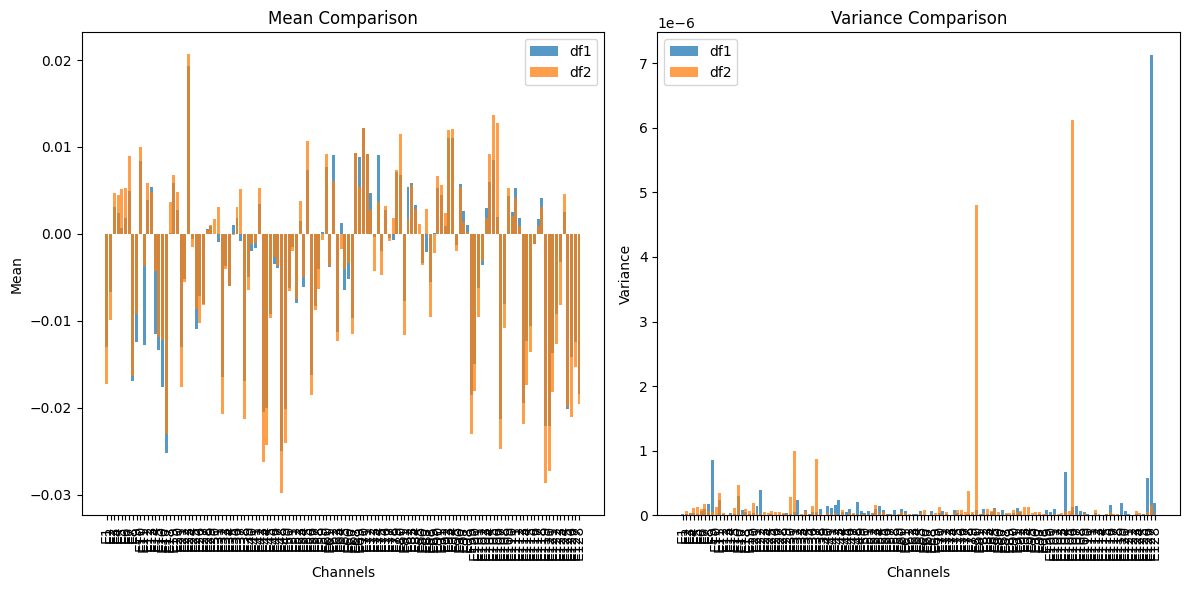

In [102]:
# Call the function to visualize the comparison results
visualize_comparison(comparison_result)